In [444]:
import numpy as np
import matplotlib.pyplot as plt # for plotting, for visualizations
import pandas as pd # for data manipulation and analysis

# Multiple Linear Regression  
The impact of several factors on medical costs

## Import Data

In [445]:
dataset = pd.read_csv('insurance.csv')

In [446]:
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Data cleaning & checking

### Replacing "smoker" and "sex" columns to a boolean & drop Region column

In [447]:
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})
dataset['sex'] = dataset['sex'].map({'male': 1, 'female': 0})

dataset = dataset.drop(columns=['region'])

print(dataset)

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


### Check to see if any row contain null  

In [448]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64


### Assignning Independent and dependent in a multiple regression model

In [449]:
X = dataset[['bmi', 'smoker', 'age', 'sex', 'children']]  # Independent variables
y = dataset['charges']  # Dependent variable 

### Split data into training and testing

In [450]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### Standardize BMI  
Since we are going to compare 5 different types of value we need to standardize so that all the variables are at the same scale.    
No need to standardize "Smoker" and "sex" since its already binary datatype

In [451]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['bmi', 'age', 'children']] = scaler.fit_transform(X_train[['bmi', 'age',  'children']])
X_test[['bmi', 'age','children']] = scaler.transform(X_test[['bmi', 'age','children']])

### Train the model

In [452]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions  
Use the trained model to make prediction on the test data.

In [453]:
y_pred = model.predict(X_test)

### Evaluate the model

In [454]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Measure the avarage squre differences between predicted values and actual values (lower is better)
print(f"Mean Squared Error:, {mse}")

#Measure how well the independent variables explain the variation in the dependent variable (closer to 1 is better)
print(f"R2 Score:, {r2}")

Mean Squared Error:, 32165826.643605117
R2 Score:, 0.7978644236809905


#### NOTE
* The mean square error is at 32165826....: which is quite large. This mean that the prediction arent very close to the real values.  
* The large value of MSE can be expected though, since MSE is dependent on the scale of medical costs, which are large in this case.
* MSE can be high if the medical costs are large, because it measures how far off the predictions are from the actual values.  The larger the value, the larger the potential error.
  
     
      
* R2: 0.7978 or 79% is pretty good, it indicates that your model is explaining a large pasrt of the variation in medical costs.  
* But there is still some room for improvement (21.41% unexplained) which suggests that other factors might also influence medical costs that havent yet been included.


### Interpreting the coefficients  
Coefficients: These numbers show how much medical costs change when one variable increases, while the other stay the same.  
Intercept: 8384.70 Is the base medical cost when all other independent variables are at 0 (starting point for the prediction)

In [455]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.98303768e+03  2.35890247e+04  3.59014588e+03 -2.34557931e+01
  5.21222901e+02]
Intercept: 8384.700553973205


## Plot actual vs. Predicted Charges

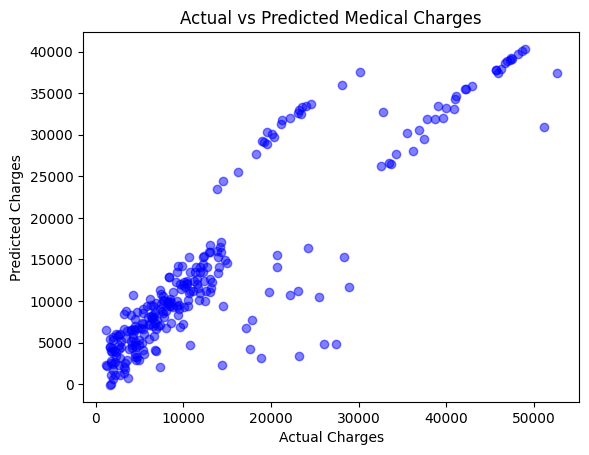

In [456]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Scatter plot of Actual vs Predicted charges
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) #alpha helps to show overlapping data points
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.show()


#### Interpretation
* Perfect model: If the model were perfect, all points would lie on 45-degree diagonal line where it meets predicted = actual  
* From the start (0-10,000 actual charges): The prediction seem pretty accurate and close to the actual charges, as most points are clustered around the diagonal.  
* But the higher the charges get, it getting more spread, which mean that the model is struggles to predict high medical costs accurately, meaning that prediction for higher charges underestimate the actual values.  
* Conclusion: This model is performing well for lower charge, but its less accurate for a higher charges

### Residual Plot  
shows an error for each prediction, where if data is at 0 indicating close to the actual value. And if far from 0, menaing model's prediction are off

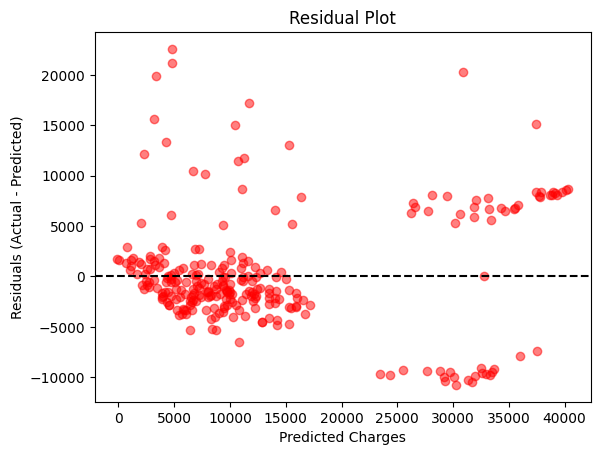

In [457]:
# checks differences between actual and predicted charges
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


#### Interpretation
* If the model predicts something perfectly, the data would be scatter around 0 line. If not, the residual shows how far off the prediction was.  
* Again, from 0-15000 (x-axeln) the residual are mostly close to 0, which indicates good predictions for lower charges.  
* But after 15000(x) the prediction is spreading with no pattern, suggesting that the model underestimate/overestimate when it comes to higher charges.
